# Import lib


In [1]:
import pandas as pd
import numpy as np
import cv2

import tensorflow
from tensorflow import keras

# useful for getting number of output classes
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

# Dataset

In [2]:
train_path = 'archive/colored_images_mod/train'
test_path = 'archive/colored_images_mod/test'

In [3]:
classes = glob('archive/colored_images_mod/train/*')

In [4]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 15,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 2929 images belonging to 5 classes.


In [9]:
test_set = test_datagen.flow_from_directory(test_path,
                                           target_size = (224, 224),
                                           batch_size = 64,
                                           class_mode = 'categorical')

Found 733 images belonging to 5 classes.


# Modified AlexNet

In [24]:
# modified Alexnet as given in the paper 
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(5,activation='softmax')    
])

In [25]:
# compling the model with loss, optimiser and metrics
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tensorflow.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy']    
)

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 32)       

In [27]:
# using test set in place of val set 
# val loss and accuracy is test loss and accuracy
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
)

Epoch 1/20
46/46 [==============================] - 37s 796ms/step - loss: 1.2958 - accuracy: 0.4899 - val_loss: 1.2362 - val_accuracy: 0.4993
Epoch 2/20
46/46 [==============================] - 35s 753ms/step - loss: 1.2130 - accuracy: 0.5101 - val_loss: 1.3081 - val_accuracy: 0.4093
Epoch 3/20
46/46 [==============================] - 33s 707ms/step - loss: 1.1731 - accuracy: 0.5377 - val_loss: 1.0997 - val_accuracy: 0.6235
Epoch 4/20
46/46 [==============================] - 32s 700ms/step - loss: 1.1537 - accuracy: 0.5381 - val_loss: 1.0358 - val_accuracy: 0.6658
Epoch 5/20
46/46 [==============================] - 32s 698ms/step - loss: 1.1357 - accuracy: 0.5394 - val_loss: 1.1006 - val_accuracy: 0.4911
Epoch 6/20
46/46 [==============================] - 34s 742ms/step - loss: 1.1003 - accuracy: 0.5787 - val_loss: 0.9885 - val_accuracy: 0.6439
Epoch 7/20
46/46 [==============================] - 36s 772ms/step - loss: 1.0935 - accuracy: 0.5825 - val_loss: 0.9967 - val_accuracy: 0.6071

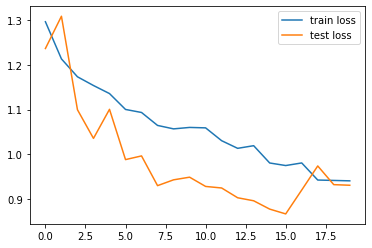

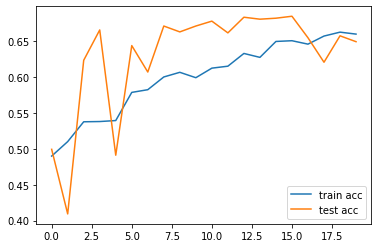

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()